In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [4]:
def plotarGrafico(df):
    X = np.array(df)
    m = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], zoom_start=13, 
                   tiles='OpenStreet Map')
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row.LATITUDE, row.LONGITUDE],
            radius=row.QUANTIDADE,
            color='#1787FE',
            fill=True,
            fill_colour='#1787FE'
        ).add_to(m)
    display(m)
    
def dbscan(df, eps, min_samples):
    X = np.array(df)
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    return db

def obterClusters(df):
    X = np.array(df)
    db = dbscan(X , .1 , 2)
    labels = db.labels_
    no_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print("numero de clusters = " + str(no_clusters))
    labels = np.array(labels)
    labels = pd.DataFrame(labels)
    df['LABELS'] = labels
    df = df.groupby(
         ['LABELS']
     ).agg(
         LATITUDE = ('LATITUDE','mean'),
         LONGITUDE = ('LONGITUDE','mean'),
         QUANTIDADE = ('LABELS','count')
     ).reset_index()
    return df

def minMax(dados , coluna):
    df_min_max_scaled = dados.copy()
    df_min_max_scaled[coluna] = (df_min_max_scaled[coluna] - df_min_max_scaled[coluna].min()) / (df_min_max_scaled[coluna].max() - df_min_max_scaled[coluna].min()) 
    dados[coluna] =  df_min_max_scaled[coluna]*100;
    return dados;

numero de clusters = 3


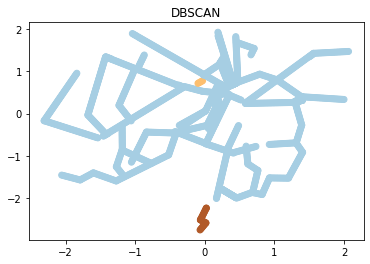

In [6]:
df = pd.read_csv("ciclovias_coord.csv" , sep =";", decimal =",", encoding = "UTF-8")
X = np.array(df)
df = obterClusters(df)
df = minMax(df, 'QUANTIDADE')
plotarGrafico(df)